In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri

[0.  0.1 0.3 0.7 1.  2.  5. ] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]


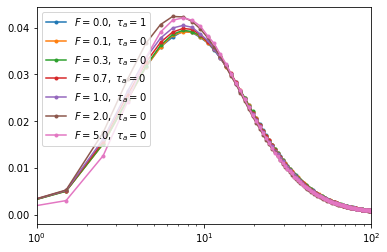

In [85]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
fpath='../../data/SAC_exp/VCV/'
ind=4

vcv=[]
Fs=[]
Tas=[]
vcv_eq=0
for fname in os.listdir(fpath):
    if 'VCV' in fname and '.npz' in fname:
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        dt=float(fname.split('_')[ind+8].replace('dt',''))
        # print(T,F,Ta,Esoft,R0)

        npzfile=np.load(fpath+fname)
        Fs.append(F)
        Tas.append(Ta)
        
        vcv_avg=simps(npzfile['hist']*npzfile['bins'], npzfile['bins'])
        # print(vcv_avg)
        vcv.append(vcv_avg)
        
        if F==0: vcv_eq=vcv_avg
        if F==0.0 or Ta==0.1:
            ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f},\ \\tau_a={:.0f}$'.format(F,Ta))

ax.legend()
ax.semilogx()
ax.set_xlim(1,100)

print(np.unique(Fs),np.unique(Tas))


(0.15, 5)

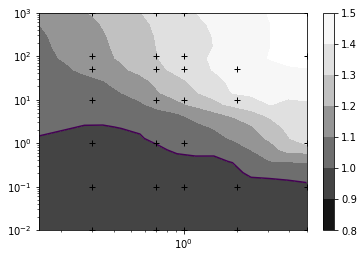

In [86]:
Xi,Yi=np.meshgrid(np.geomspace(0.05,5,20),np.logspace(-2,3,20))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.around(np.array(vcv)/vcv_eq, 2))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(0.8,1.6,0.1),cmap='Greys_r')
plt.colorbar()
plt.contour(Xi, Yi, Zi, levels=[1.],)
plt.plot(Fs,Tas,'k+')
plt.loglog()
plt.xlim(0.15,5)
